People were not impressed [this map](https://www.reddit.com/r/assholedesign/comments/jigsq7/lets_play_are_3000_or_300000_of_my_neighbors/) ([made from these data](https://covid.cdc.gov/covid-data-tracker/index.html#county-map). Let's improve it.

## Data Prep

First we, need to find the data. Clicking USAFacts.org link below the map takes me [here](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/). There's already a better map there but a) it's an unclassified choropleth and b) I want to make my own. 

Look, there's some links to download data:
- [Known Cases](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv)  ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_confirmed_usafacts_2020-10-27.csv) of data on 2020-10-27)
- [County Populations](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv) ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_county_population_usafacts_2020-10-27.csv) of data on 2020-10-27)

Now I need a shapefile to link the county data to. Download a shapefile from [US census website](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) - we'll use the most coarse resolution (1:20,000,000) to keep things simple. ([cache](https://github.com/jamesdamillington/usa-covid-mapping/tree/main/data/cb_2019_us_county_20m_2020-10-27) of file on 2020-10-27)

In [59]:
import pandas as pd

In [17]:
cty_cases = pd.read_csv("data/covid_confirmed_usafacts_2020-10-27.csv")
cty_cases.head()

countyFIPS            County Name State  stateFIPS  1/22/20  1/23/20  \
0           0  Statewide Unallocated    AL          1        0        0   
1        1001         Autauga County    AL          1        0        0   
2        1003         Baldwin County    AL          1        0        0   
3        1005         Barbour County    AL          1        0        0   
4        1007            Bibb County    AL          1        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  \
0        0        0        0        0  ...         0         0         0   
1        0        0        0        0  ...      1966      1983      1989   
2        0        0        0        0  ...      6333      6350      6369   
3        0        0        0        0  ...       968       977       981   
4        0        0        0        0  ...       771       775       785   

   10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
0         0         0         0         0         0         0         0  
1      1999      2010      2021      2023      2030      2048      2059  
2      6375      6405      6443      6475      6615      6637      6658  
3       981       988       996       997      1012      1031      1033  
4       789       791       801       811       825       828       840  

[5 rows x 282 columns]

Note that every state gets a row for data unallocated to a county: 

In [18]:
cty_cases.sort_values(by='countyFIPS').head()

countyFIPS            County Name State  stateFIPS  1/22/20  1/23/20  \
0              0  Statewide Unallocated    AL          1        0        0   
1338           0  Statewide Unallocated    MN         27        0        0   
1254           0  Statewide Unallocated    MI         26        0        0   
1239           0  Statewide Unallocated    MA         25        0        0   
1214           0  Statewide Unallocated    MD         24        0        0   

      1/24/20  1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  \
0           0        0        0        0  ...         0         0         0   
1338        0        0        0        0  ...       177       215       215   
1254        0        0        0        0  ...      6292      6305      6305   
1239        0        0        0        0  ...      1071      1086      1101   
1214        0        0        0        0  ...         0         0         0   

      10/19/20  10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
0            0         0         0         0         0         0         0  
1338       195       195       195       211       201       201       292  
1254      6741      6745      6765      6812      6942      7036      7036  
1239      1116      1129      1139      1139      1139      1157      1157  
1214         0         0         0         0         0         0         0  

[5 rows x 282 columns]

Let's drop this so that we have county-specific data only:

In [19]:
cty_cases = cty_cases[cty_cases['countyFIPS'] > 1000]
cty_cases.sort_values(by='countyFIPS').head()

countyFIPS     County Name State  stateFIPS  1/22/20  1/23/20  1/24/20  \
1        1001  Autauga County    AL          1        0        0        0   
2        1003  Baldwin County    AL          1        0        0        0   
3        1005  Barbour County    AL          1        0        0        0   
4        1007     Bibb County    AL          1        0        0        0   
5        1009   Blount County    AL          1        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  10/16/20  10/17/20  10/18/20  10/19/20  \
1        0        0        0  ...      1966      1983      1989      1999   
2        0        0        0  ...      6333      6350      6369      6375   
3        0        0        0  ...       968       977       981       981   
4        0        0        0  ...       771       775       785       789   
5        0        0        0  ...      1783      1807      1827      1838   

   10/20/20  10/21/20  10/22/20  10/23/20  10/24/20  10/25/20  
1      2010      2021      2023      2030      2048      2059  
2      6405      6443      6475      6615      6637      6658  
3       988       996       997      1012      1031      1033  
4       791       801       811       825       828       840  
5      1848      1873      1893      1911      1925      1932  

[5 rows x 282 columns]

Do above for populaiton data

In [20]:
cty_pops = pd.read_csv("data/covid_county_population_usafacts_2020-10-27.csv")
cty_pops = cty_pops[cty_pops['countyFIPS'] > 1000]
cty_pops.sort_values(by='countyFIPS').head()

countyFIPS     County Name State  population
1        1001  Autauga County    AL       55869
2        1003  Baldwin County    AL      223234
3        1005  Barbour County    AL       24686
4        1007     Bibb County    AL       22394
5        1009   Blount County    AL       57826

Join these dfs (checking one-to-one merge):

In [21]:
cty_dat = pd.merge(cty_cases,cty_pops, how='left', on='countyFIPS', validate="1:1")

Now the spatial data

In [22]:
import geopandas as gpd

In [23]:
cty_shp = gpd.read_file("data/cb_2019_us_county_20m_2020-10-27/cb_2019_us_county_20m.shp")
cty_shp.sort_values(by="COUNTYFP").head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
1891      48      001  01383786  0500000US48001  48001  Anderson   06   
3055      24      001  01713506  0500000US24001  24001  Allegany   06   
996       06      001  01675839  0500000US06001  06001   Alameda   06   
367       12      001  00308548  0500000US12001  12001   Alachua   06   
2231      51      001  01480091  0500000US51001  51001  Accomack   06   

           ALAND      AWATER  \
1891  2752201306    39808595   
3055  1093462025    14801442   
996   1909614756   216907015   
367   2267634813   241567998   
2231  1163708393  2229277504   

                                               geometry  
1891  POLYGON ((-96.05279 32.00589, -95.42851 32.084...  
3055  POLYGON ((-79.06689 39.48062, -78.92842 39.723...  
996   POLYGON ((-122.33371 37.80980, -122.30393 37.8...  
367   POLYGON ((-82.65855 29.83014, -82.64063 29.828...  
2231  POLYGON ((-75.94118 37.56384, -75.89866 37.635...

No common column with cty_dat df (e.g. countyFIPS) to merge on. Need to combine STATEFP and COUNTYFP to create a common (countyFIPS) column.

As indicated [here](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html):
> FIPS codes for smaller geographic entities are usually unique within larger geographic entities. For example, FIPS state codes are unique within nation and FIPS county codes are unique within state. Since counties nest within states, a full county FIPS code identifies both the state and the nesting county. For example, there are 49 counties in the 50 states ending in the digits “001”. To make these county FIPS codes unique, the state FIPS codes are added to the front of each county (01001, 02001, 04001, etc), where the first two digits refer to the state the county is in and the last three digits refer specifically to the county.

The head of cty_dat above has 4-digit codes, maybe that's because some states have single digit codes. Look at the tail to check if they are 5-digit:

In [24]:
cty_dat.tail()

countyFIPS      County Name_x State_x  stateFIPS  1/22/20  1/23/20  \
3139       56037  Sweetwater County      WY         56        0        0   
3140       56039       Teton County      WY         56        0        0   
3141       56041       Uinta County      WY         56        0        0   
3142       56043    Washakie County      WY         56        0        0   
3143       56045      Weston County      WY         56        0        0   

      1/24/20  1/25/20  1/26/20  1/27/20  ...  10/19/20  10/20/20  10/21/20  \
3139        0        0        0        0  ...       422       428       436   
3140        0        0        0        0  ...       711       715       715   
3141        0        0        0        0  ...       403       404       407   
3142        0        0        0        0  ...       135       139       142   
3143        0        0        0        0  ...        99       101       103   

      10/22/20  10/23/20  10/24/20  10/25/20      County Name_y  State_y  \
3139       443       451       456       462  Sweetwater County       WY   
3140       727       740       743       747       Teton County       WY   
3141       410       425       428       431       Uinta County       WY   
3142       143       144       145       145    Washakie County       WY   
3143       115       121       127       127      Weston County       WY   

      population  
3139       42343  
3140       23464  
3141       20226  
3142        7805  
3143        6927  

[5 rows x 285 columns]

Yep. But we should force countyFIPS in cty_dat to 5-digits to be safe. Quick check what dtype the columns are:

In [25]:
cty_dat.dtypes

countyFIPS        int64
County Name_x    object
State_x          object
stateFIPS         int64
1/22/20           int64
                  ...  
10/24/20          int64
10/25/20          int64
County Name_y    object
State_y          object
population        int64
Length: 285, dtype: object

We have integers, but these will become str after format:

In [26]:
cty_dat['countyFIPS'] = cty_dat['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [27]:
cty_dat.dtypes

countyFIPS       object
County Name_x    object
State_x          object
stateFIPS         int64
1/22/20           int64
                  ...  
10/24/20          int64
10/25/20          int64
County Name_y    object
State_y          object
population        int64
Length: 285, dtype: object

In [28]:
cty_dat.head()

countyFIPS   County Name_x State_x  stateFIPS  1/22/20  1/23/20  1/24/20  \
0      01001  Autauga County      AL          1        0        0        0   
1      01003  Baldwin County      AL          1        0        0        0   
2      01005  Barbour County      AL          1        0        0        0   
3      01007     Bibb County      AL          1        0        0        0   
4      01009   Blount County      AL          1        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  10/19/20  10/20/20  10/21/20  10/22/20  \
0        0        0        0  ...      1999      2010      2021      2023   
1        0        0        0  ...      6375      6405      6443      6475   
2        0        0        0  ...       981       988       996       997   
3        0        0        0  ...       789       791       801       811   
4        0        0        0  ...      1838      1848      1873      1893   

   10/23/20  10/24/20  10/25/20   County Name_y  State_y  population  
0      2030      2048      2059  Autauga County       AL       55869  
1      6615      6637      6658  Baldwin County       AL      223234  
2      1012      1031      1033  Barbour County       AL       24686  
3       825       828       840     Bibb County       AL       22394  
4      1911      1925      1932   Blount County       AL       57826  

[5 rows x 285 columns]

Now create common column in cty_shp

STATEFP and COUNTYFP in cty_shp are string. So:
- concat STATEFP and COUNTYFP
- pad to 5 digits

In [29]:
cty_shp['countyFIPS'] = cty_shp['STATEFP'] + cty_shp['COUNTYFP']
cty_shp['countyFIPS'] = cty_shp['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [30]:
cty_shp.sort_values(by='countyFIPS').head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD  \
679       01      001  00161526  0500000US01001  01001  Autauga   06   
1220      01      003  00161527  0500000US01003  01003  Baldwin   06   
2284      01      005  00161528  0500000US01005  01005  Barbour   06   
1978      01      007  00161529  0500000US01007  01007     Bibb   06   
109       01      009  00161530  0500000US01009  01009   Blount   06   

           ALAND      AWATER  \
679   1539602137    25706961   
1220  4117621645  1132980868   
2284  2292160139    50523213   
1978  1612167476     9602089   
109   1670103866    15015467   

                                               geometry countyFIPS  
679   POLYGON ((-86.91759 32.66417, -86.71339 32.661...      01001  
1220  POLYGON ((-88.02632 30.75336, -87.94455 30.827...      01003  
2284  POLYGON ((-85.73573 31.62449, -85.66565 31.786...      01005  
1978  POLYGON ((-87.42194 33.00338, -87.31854 33.006...      01007  
109   POLYGON ((-86.96336 33.85822, -86.92439 33.909...      01009

Now we're ready to merge data with shapefile:

In [31]:
cty_all = pd.merge(cty_shp, cty_dat,  how='left', on='countyFIPS')

Let's work with conterminous states only (state codes [here](https://www.census.gov/library/reference/code-lists/ansi.html#par_textimage_3))

In [32]:
cty_cont = cty_all.dropna()
cty_cont = cty_cont[cty_cont['State_y'] != 'AK']
cty_cont = cty_cont[cty_cont['State_y'] != 'HI']

<AxesSubplot:>

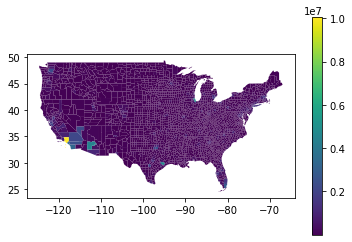

In [33]:
cty_cont.plot('population', legend=True)

<AxesSubplot:>

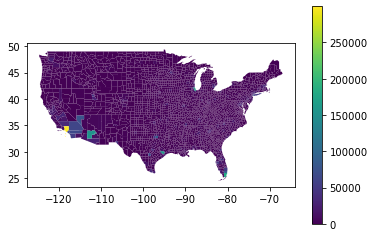

In [34]:
cty_cont.plot('10/25/20', legend=True)

In [35]:
cty_cont['case_rate_1025'] = cty_cont['10/25/20'] / cty_cont['population']

<AxesSubplot:>

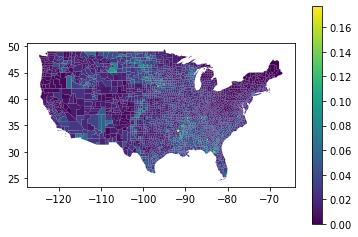

In [36]:
cty_cont.plot('case_rate_1025', legend=True)

In [37]:
cty_cont['case_rate_100k_1025'] = cty_cont['case_rate_1025'] * 100000

<AxesSubplot:>

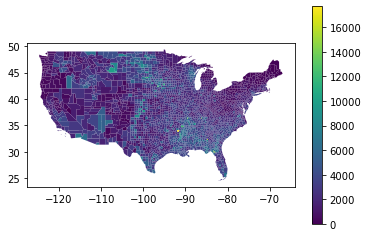

In [38]:
cty_cont.plot('case_rate_100k_1025', legend=True)

## Select, manipulate and save

In [39]:
cty_cont_1025 = cty_cont[['NAME','geometry', 'countyFIPS', 'State_y', 'population', '10/25/20']]

In [40]:
cty_cont_1025.head()

NAME                                           geometry countyFIPS  \
0       Worth  POLYGON ((-94.63203 40.57176, -94.53388 40.570...      29227   
1    Franklin  POLYGON ((-99.17940 40.35068, -98.72683 40.350...      31061   
2  Chautauqua  POLYGON ((-79.76195 42.26986, -79.62748 42.324...      36013   
3       Vance  POLYGON ((-78.49773 36.51467, -78.45728 36.541...      37181   
4     Weakley  POLYGON ((-88.94916 36.41010, -88.81642 36.410...      47183   

  State_y  population  10/25/20  
0      MO      2013.0      34.0  
1      NE      2979.0      89.0  
2      NY    126903.0     884.0  
3      NC     44535.0    1179.0  
4      TN     33328.0    1561.0

In [30]:
cty_cont_1025.rename(columns = {'NAME': 'countyName',
                               'State_y': 'stateName',
                               '10/25/20': '2020-10-25'},  
          inplace = True) 

cty_cont_1025['case_rate_100k'] = 100000 * cty_cont_1025['2020-10-25'] / cty_cont_1025['population']

cty_cont_1025.head()

countyName                                           geometry countyFIPS  \
0       Worth  POLYGON ((-94.63203 40.57176, -94.53388 40.570...      29227   
1    Franklin  POLYGON ((-99.17940 40.35068, -98.72683 40.350...      31061   
2  Chautauqua  POLYGON ((-79.76195 42.26986, -79.62748 42.324...      36013   
3       Vance  POLYGON ((-78.49773 36.51467, -78.45728 36.541...      37181   
4     Weakley  POLYGON ((-88.94916 36.41010, -88.81642 36.410...      47183   

  stateName  population  2020-10-25  case_rate_100k  
0        MO      2013.0        34.0     1689.021361  
1        NE      2979.0        89.0     2987.579725  
2        NY    126903.0       884.0      696.595037  
3        NC     44535.0      1179.0     2647.356012  
4        TN     33328.0      1561.0     4683.749400

In [36]:
cty_cont_1025.to_csv('data/covid_usacont_2020-10-25.csv',index=False)

## Choropleths

From [Rey _et al._ (2020)](https://geographicdata.science/book/notebooks/05_choropleth.html)
> Different classification schemes obtain from their definition of the class boundaries. The choice of the classification scheme should take into consideration the statistical distribution of the attribute values.

In [60]:
import numpy as np
import mapclassify
import matplotlib.pyplot as plt
import palettable.colorbrewer.sequential as pcs

In [114]:
cty_cont = pd.read_csv('data/covid_usacont_2020-10-25.csv')
cty_cont.head()

countyName                                           geometry  countyFIPS  \
0       Worth  POLYGON ((-94.6320259176948 40.5717595874, -94...       29227   
1    Franklin  POLYGON ((-99.17940299999999 40.350681, -98.72...       31061   
2  Chautauqua  POLYGON ((-79.761951 42.26986, -79.627484 42.3...       36013   
3       Vance  POLYGON ((-78.49772899999999 36.51467299999999...       37181   
4     Weakley  POLYGON ((-88.949163 36.410099, -88.8164199999...       47183   

  stateName  population  2020-10-25  case_rate_100k  
0        MO      2013.0        34.0     1689.021361  
1        NE      2979.0        89.0     2987.579725  
2        NY    126903.0       884.0      696.595037  
3        NC     44535.0      1179.0     2647.356012  
4        TN     33328.0      1561.0     4683.749400

In [115]:
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry

cty_cont = gpd.GeoDataFrame(cty_cont)  #geopandas
cty_cont['geometry'] = cty_cont['geometry'].apply(lambda x: loads(x))  #from shapely
cty_cont = cty_cont.set_geometry('geometry')

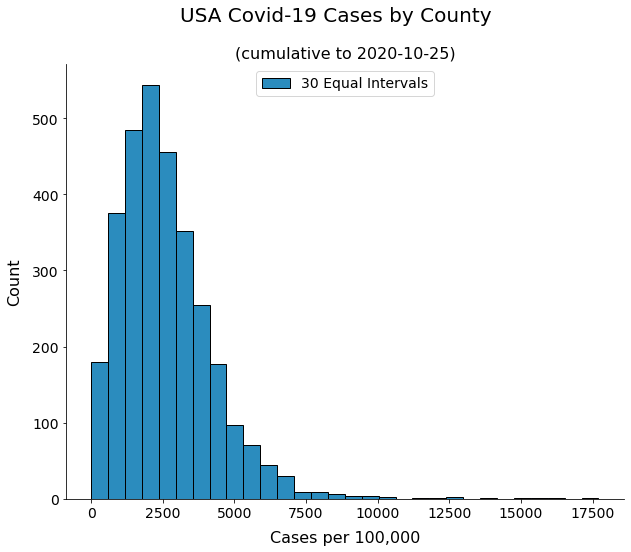

In [42]:
nbins = 30

fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont['case_rate_100k'].hist(
    color='#2b8cbe',
    edgecolor='black',
    grid=False,
    bins=nbins,
    ax=ax)


plt.tick_params(labelsize=14)  
plt.xlabel("Cases per 100,000",labelpad=10, fontsize=16)
plt.ylabel("Count",labelpad=10, fontsize=16)   
plt.suptitle("USA Covid-19 Cases by County", fontsize=20)
plt.title("(cumulative to 2020-10-25)", fontsize=16)

ax.spines['right'].set_visible(False)     
ax.spines['top'].set_visible(False)

plt.legend(['{0} Equal Intervals'.format(nbins)], 
           loc='upper center', 
           prop={'size': 14})

plt.savefig("img/hist_rawdata_30bins.png", dpi=300, bbox_inches='tight', facecolor='white') #save file to img folder



plt.show()

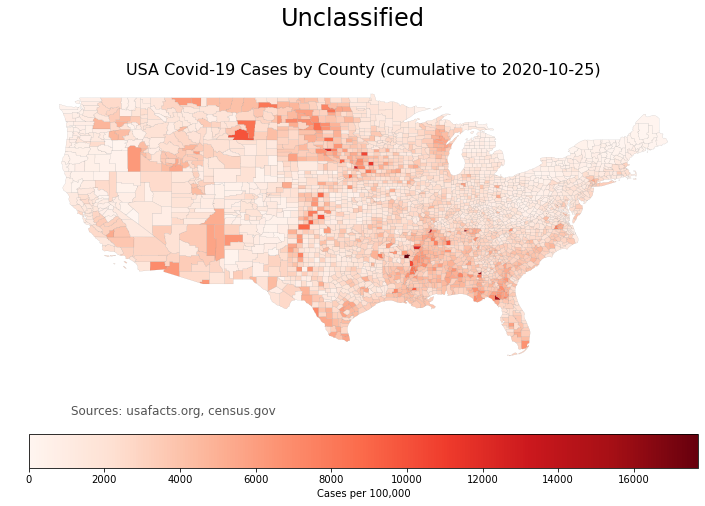

In [43]:
#code to plot single classifier map

fig, ax1 = plt.subplots(1, figsize=(12, 8))
cty_cont.plot(column='case_rate_100k', cmap="Reds", edgecolor='grey', linewidth=0.1,
              ax=ax1, legend=True, legend_kwds={'label': "Cases per 100,000", 'orientation': "horizontal"})

ax1.axis('off') #don't plot the axes (bounding box)

plt.suptitle("Unclassified", fontsize=24)
plt.title("USA Covid-19 Cases by County (cumulative to 2020-10-25)", fontsize=16)

ax1.annotate('Sources: usafacts.org, census.gov',
             xy=(0.1, 0.2), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')  #add source info on the image itself

plt.savefig("img/map_unclassified.png", dpi=200, bbox_inches='tight', facecolor='white') #save file to img folder

plt.show()

In [44]:
import numpy as np
import mapclassify
import matplotlib.pyplot as plt

def hist_classification_comparison(classifier, classbins, rawbins):

    #requires numpy (as np), mapclassify, matplotlib.pyplot (as plt)
    np.random.seed(12345)
 

    cf = None  #check below, if we don't assign anything don't plot anything 
    
    #clunky
    if(classifier == "Equal Intervals"):
        cf = mapclassify.EqualInterval(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
    elif(classifier == "Quantiles"):
        cf = mapclassify.Quantiles(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
    elif(classifier == "Mean-StdDev"):
        cf = mapclassify.StdMean(cty_cont['case_rate_100k'])
        cbins = cf.bins.tolist()
    elif(classifier == "Max Breaks"):
        cf = mapclassify.MaximumBreaks(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
    elif(classifier == "Head-Tail Breaks"):
        cf = mapclassify.HeadTailBreaks(cty_cont['case_rate_100k'])
        cbins = [0] + cf.bins.tolist()
    elif(classifier == "Fisher Jenks"):
        cf = mapclassify.FisherJenks(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
    
        
    if(cf != None):
        
#        print(cf)
        
        fig, ax = plt.subplots(1, figsize=(10, 8))
    
        #plot histogram for the classifier 
        cty_cont['case_rate_100k'].hist(
            bins=cbins,
            color='#a6bddb',
            edgecolor='black',
            grid=False)


        #plot histogram for the 'raw data' (equal interval but with more bins)
        cty_cont['case_rate_100k'].hist(
            bins=rawbins,
            color='#2b8cbe',
            edgecolor='black',
            grid=False,
            ax=ax)


        plt.tick_params(labelsize=14)  
        plt.xlabel("Cases per 100,000",labelpad=10, fontsize=16)
        plt.ylabel("Count",labelpad=10, fontsize=16)   
        plt.suptitle("USA Covid-19 Cases by County", fontsize=20)
        plt.title("(cumulative to 2020-10-25)", fontsize=16)

        ax.spines['right'].set_visible(False)     
        ax.spines['top'].set_visible(False)
        ax.set_ylim(ymin=0,ymax=3250)

        plt.legend(['{0} ({1} classes)'.format(classifier, len(cbins)-1),'Equal Intervals ({0} classes)'.format(rawbins)],
                    loc='upper center', prop={'size': 14})
       
        #add check that img/ exists?
        plt.savefig("img/hist_raw{0}_{1}{2}.png".format(rawbins,classifier,len(cbins)-1), 
                    dpi=300, bbox_inches='tight', facecolor='white') #save file to img folder

        plt.show()
    
    else:
        print(classifier + " is an invalid classifier. Use 'Equal Intervals', 'Quantiles', 'Mean-StdDev', 'Max Breaks', 'Head-Tail Breaks' or 'Fisher Jenks'")
        return
   


### Equal Interval

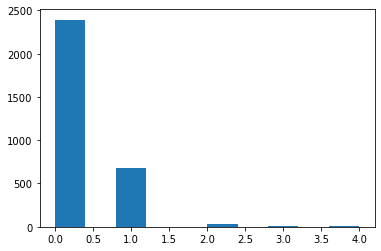

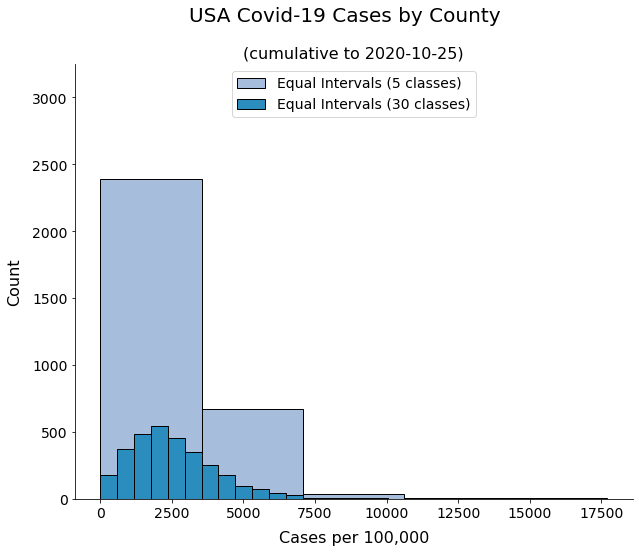

In [233]:
hist_classification_comparison("Equal Intervals", classbins=5, rawbins=30)

In [279]:
#function to plot choropleth map of 'case_rate_100k' for user defined classifier and classbins

#from https://pysal.org/mapclassify/notebooks/03_choropleth.html
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

def map_classification_comparison(classifier, classbins):

    #requires numpy (as np), mapclassify, matplotlib.pyplot (as plt), palettable.colorbrewer.sequential (as pcs)
    
    np.random.seed(12345)
    
    s=None
    
    if(classifier == "Equal Intervals"):
        cf = mapclassify.EqualInterval(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
        s= "EqualInterval"
    elif(classifier == "Quantiles"):
        cf = mapclassify.Quantiles(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
        s="Quantiles"
    elif(classifier == "Mean-StdDev"):
        cf = mapclassify.StdMean(cty_cont['case_rate_100k'])
        cbins = cf.bins.tolist()
        s="StdMean"
    elif(classifier == "Max Breaks"):
        cf = mapclassify.MaximumBreaks(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
        s="MaximumBreaks"
    elif(classifier == "Head-Tail Breaks"):
        cf = mapclassify.HeadTailBreaks(cty_cont['case_rate_100k'])
        cbins = [0] + cf.bins.tolist()
        s="HeadTailBreaks"
    elif(classifier == "Fisher Jenks"):
        cf = mapclassify.FisherJenks(cty_cont['case_rate_100k'], k=classbins)
        cbins = [0] + cf.bins.tolist()
        s="FisherJenks"
    
        
    #clunky
    if(len(cbins)-1 == 5):
        rcmap = pcs.Reds_5.mpl_colormap
    elif(len(cbins)-1 < 5):
        rcmap = pcs.Reds_4.mpl_colormap
    elif(len(cbins)-1 == 6):
        rcmap = pcs.Reds_6.mpl_colormap
    elif(len(cbins)-1 == 7):
        rcmap = pcs.Reds_7.mpl_colormap
    elif(len(cbins)-1 > 7):
        rcmap = pcs.Reds_9.mpl_colormap
    
    if(s != None):
    
        
        fig, ax1 = plt.subplots(1, figsize=(14, 8))

        cty_cont.assign(cl=cf.yb).plot(column='cl',categorical=True,
                                       k=len(cbins)-1, cmap=rcmap, edgecolor='grey', linewidth=0.1, 
                                       ax=ax1, legend=True, legend_kwds={'loc': 'lower right',
                                                       'title': "Cases per 100,000",})
        ax1.axis('off') #don't plot the axes (bounding box)

        plt.suptitle(classifier, fontsize=20)
        plt.title("USA Covid-19 Cases by County (cumulative to 2020-10-25)", fontsize=16)

        ax1.annotate('Sources: usafacts.org, census.gov',
                     xy=(0.1, 0.11), xycoords='figure fraction', 
                     horizontalalignment='left', verticalalignment='top', 
                     fontsize=12, color='#555555')  #add source info on the image itself
       
        #from https://pysal.org/mapclassify/notebooks/03_choropleth.html
        mapping = dict([(i,s) for i,s in enumerate(cf.get_legend_classes())])
        replace_legend_items(ax1.get_legend(), mapping)
        
        #add check that img/ exists?
        plt.savefig("img/map_{0}{1}.png".format(s,len(cbins)-1), 
                    dpi=200, bbox_inches='tight', facecolor='white') #save file to img folder
        
        plt.show()
        
    else:
        print(classifier + " is an invalid classifier. Use 'Equal Intervals', 'Quantiles', 'Mean-StdDev', 'Max Breaks', 'Head-Tail Breaks' or 'Fisher Jenks'")
        return

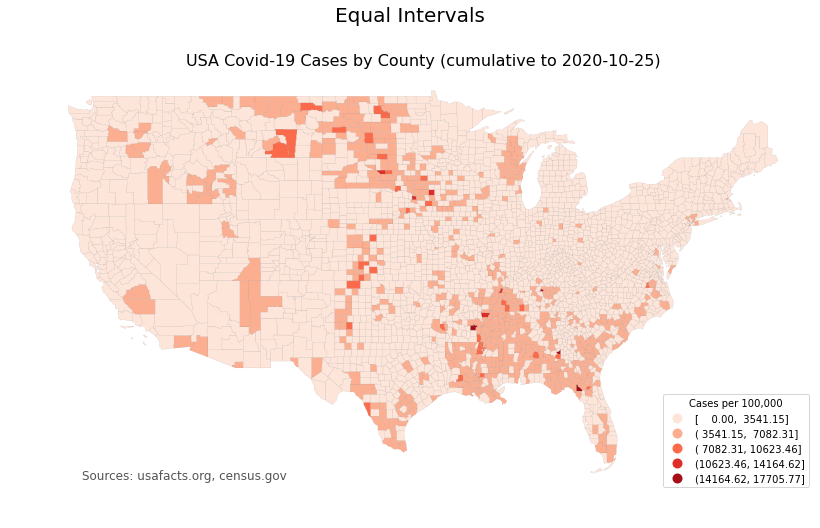

In [280]:
map_classification_comparison("Equal Intervals", 5)

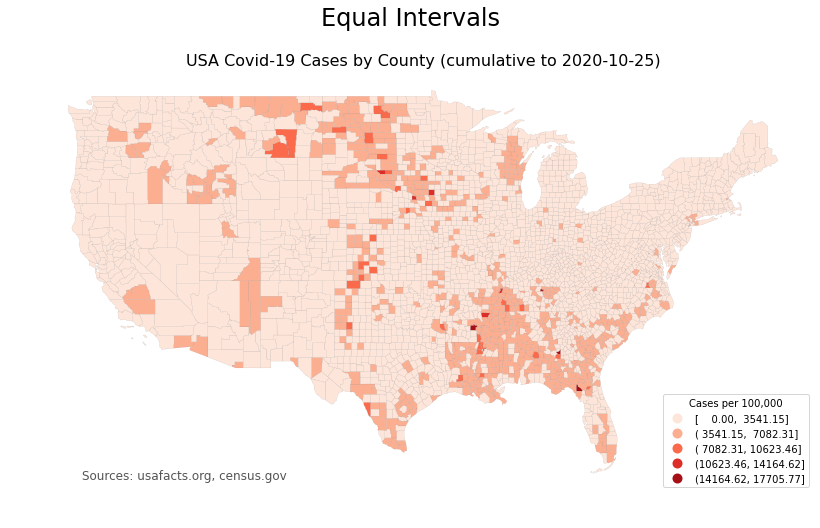

In [270]:
#code to plot single classifier map

fig, ax1 = plt.subplots(1, figsize=(14, 8))
cty_cont.plot(column='case_rate_100k', scheme='equalinterval', k=5, 
              cmap=pcs.Reds_5.mpl_colormap, edgecolor='grey', linewidth=0.1,
              ax=ax1, legend=True, legend_kwds={'title': "Cases per 100,000",'loc': 'lower right'})

ax1.axis('off') #don't plot the axes (bounding box)

plt.suptitle("Equal Intervals", fontsize=24)
plt.title("USA Covid-19 Cases by County (cumulative to 2020-10-25)", fontsize=16)

ax1.annotate('Sources: usafacts.org, census.gov',
             xy=(0.1, 0.11), xycoords='figure fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=12, color='#555555')  #add source info on the image itself

plt.show()

In [47]:
def map_nclasses_comparison(classifier):

    #clunky
    s=None
    if(classifier == "Equal Intervals"):
        s= "EqualInterval"
    elif(classifier == "Quantiles"):
        s="Quantiles"
    elif(classifier == "Mean-StdDev"):
        s="StdMean"
    elif(classifier == "Max Breaks"):
        s="MaximumBreaks"
    elif(classifier == "Head-Tail Breaks"):
        s="HeadTailBreaks"
    elif(classifier == "Fisher Jenks"):
        s="FisherJenks"
       
    if(s != None):
        fig, axs = plt.subplots(2,2, figsize=(14, 8))
        myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
        cmaps = [pcs.Reds_3.mpl_colormap,pcs.Reds_5.mpl_colormap,pcs.Reds_7.mpl_colormap,pcs.Reds_9.mpl_colormap]

        for idx, val in enumerate([3,5,7,9]):   

            cty_cont.plot(column='case_rate_100k', scheme=s, k=val, 
                          cmap=cmaps[idx], edgecolor='grey', linewidth=0.1,
                          ax=myaxs[idx], legend=True, legend_kwds={'loc': 'lower right','fontsize':'xx-small'})
            myaxs[idx].set_title("{0}, {1} classes".format(classifier, val))
            myaxs[idx].axis('off') #don't plot the axes (bounding box)

        #add check that img/ exists?
        plt.savefig("img/map_{0}_classes_comparison.png".format(classifier), 
                    dpi=200, bbox_inches='tight', facecolor='white') #save file to img folder

        plt.show()
        
    else:
        print(classifier + " is an invalid classifier. Use 'Equal Intervals', 'Quantiles', 'Mean-StdDev', 'Max Breaks', 'Head-Tail Breaks' or 'Fisher Jenks'")
        return

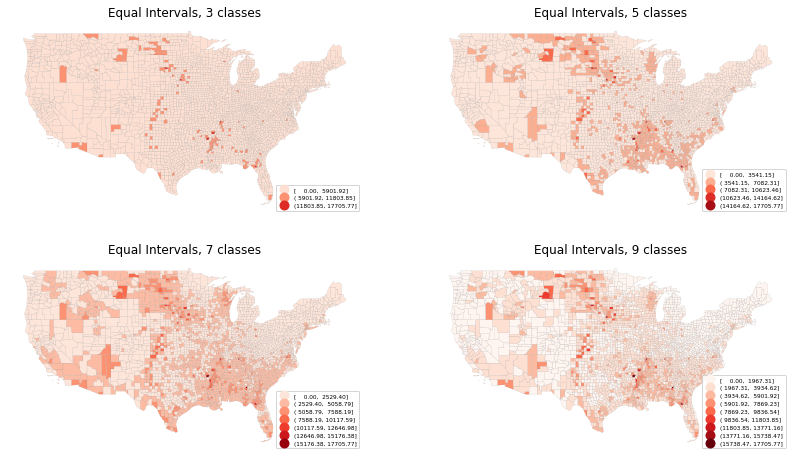

In [48]:
map_nclasses_comparison('Equal Intervals')

### Quantiles

Quantiles                   

      Interval         Count
----------------------------
[    0.00,  1254.31] |   622
( 1254.31,  1974.91] |   621
( 1974.91,  2711.62] |   622
( 2711.62,  3714.43] |   621
( 3714.43, 17705.77] |   622


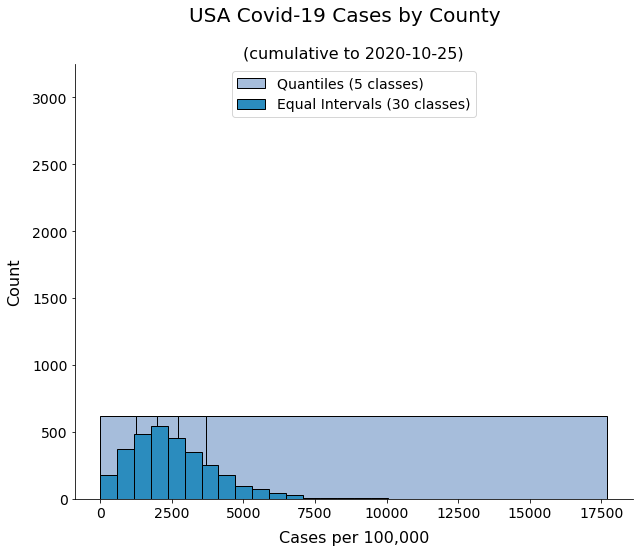

In [142]:
hist_classification_comparison("Quantiles", classbins=5, rawbins=30)

<AxesSubplot:>

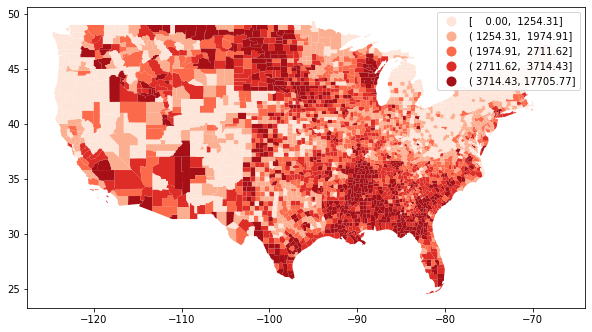

In [85]:
#simple plot
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='quantiles',cmap=Reds_5.mpl_colormap, ax=ax, legend=True)

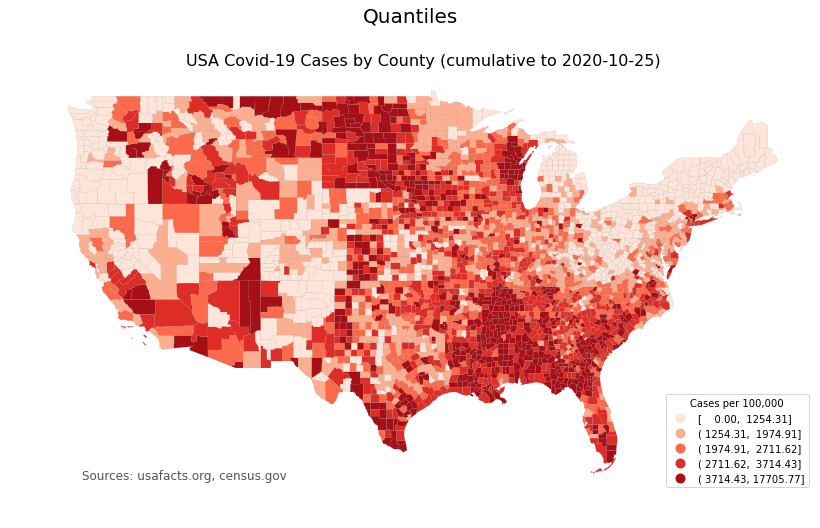

In [281]:
map_classification_comparison("Quantiles", 5)

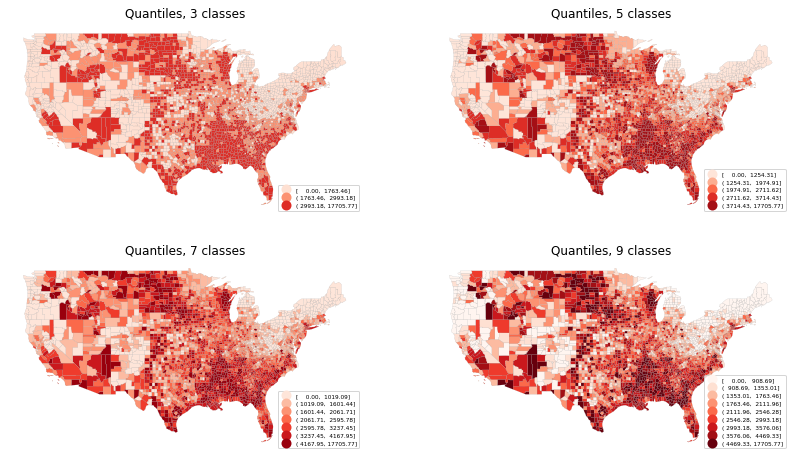

In [49]:
map_nclasses_comparison('Quantiles')

### Mean SD

In [35]:
print("Mean: {0:.2f}".format(cty_cont['case_rate_100k'].mean()))
print("Std Dev: {0:.2f}".format(cty_cont['case_rate_100k'].std()))

print("Mean less 1 SD: {0:.2f}".format(cty_cont['case_rate_100k'].mean() - cty_cont['case_rate_100k'].std()))
print("Mean plus 1 SD: {0:.2f}".format(cty_cont['case_rate_100k'].mean() + cty_cont['case_rate_100k'].std()))

print("Mean less 2 SD: {0:.2f}".format(cty_cont['case_rate_100k'].mean() - 2 * cty_cont['case_rate_100k'].std()))
print("Mean plus 2 SD: {0:.2f}".format(cty_cont['case_rate_100k'].mean() + 2 * cty_cont['case_rate_100k'].std()))

Mean: 2606.37
Std Dev: 1660.17
Mean less 1 SD: 946.20
Mean plus 1 SD: 4266.54
Mean less 2 SD: -713.98
Mean plus 2 SD: 5926.71


StdMean                     

      Interval         Count
----------------------------
(    -inf,  -713.98] |     0
( -713.98,   946.20] |   378
(  946.20,  4266.54] |  2326
( 4266.54,  5926.71] |   290
( 5926.71, 17705.77] |   114


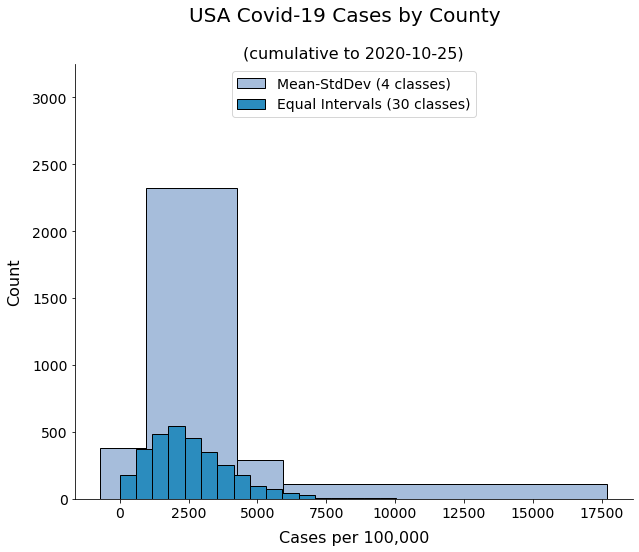

In [143]:
hist_classification_comparison("Mean-StdDev", classbins=5, rawbins=30)

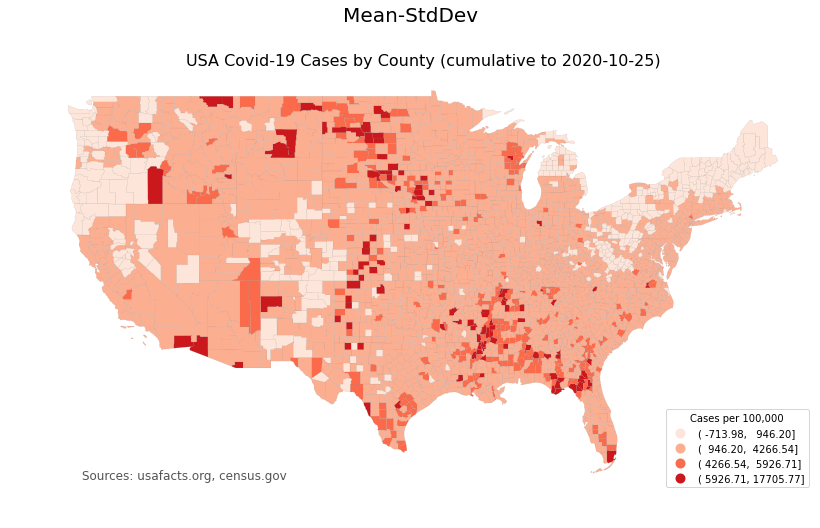

In [282]:
map_classification_comparison("Mean-StdDev", 5)

<AxesSubplot:>

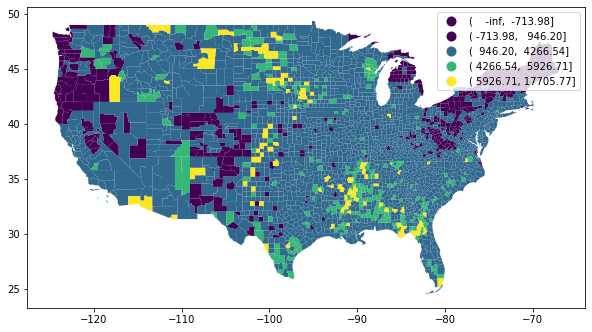

In [94]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='StdMean', ax=ax, legend=True)

### Maximum Breaks

MaximumBreaks               

      Interval         Count
----------------------------
[    0.00, 10995.40] |  3099
(10995.40, 13326.47] |     4
(13326.47, 14571.32] |     1
(14571.32, 16838.58] |     3
(16838.58, 17705.77] |     1


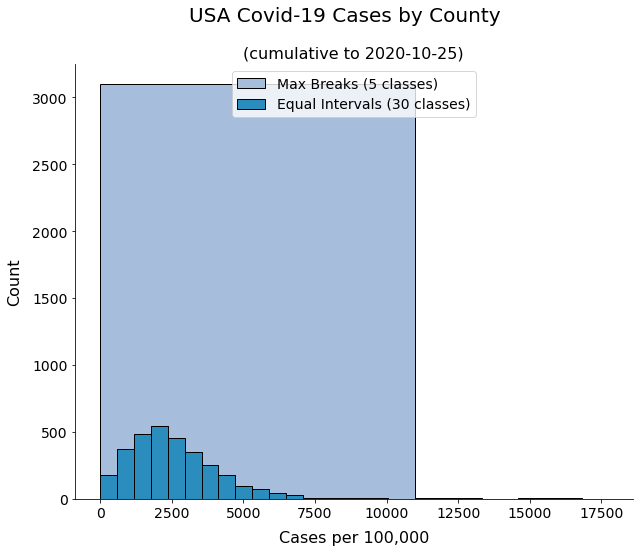

In [144]:
hist_classification_comparison("Max Breaks", classbins=5, rawbins=30)

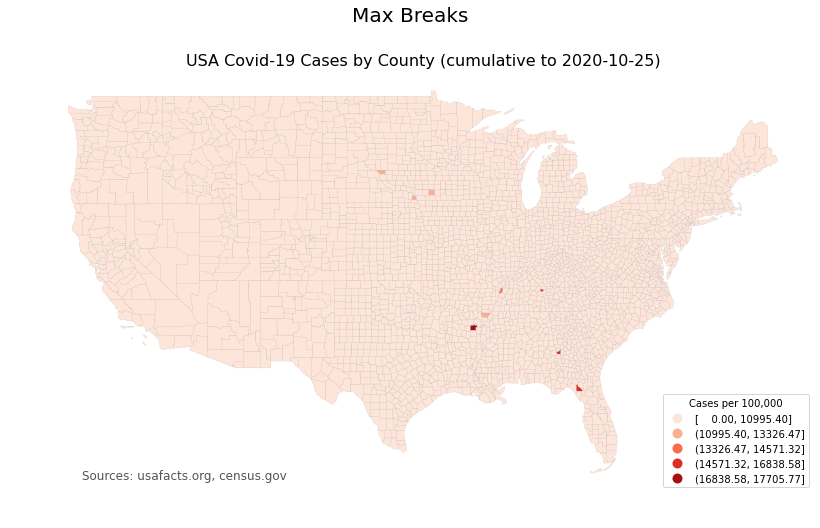

In [283]:
map_classification_comparison("Max Breaks", 5)

<AxesSubplot:>

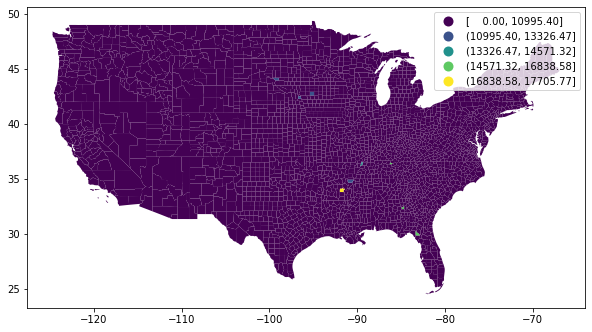

In [124]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='MaximumBreaks', ax=ax, legend=True)

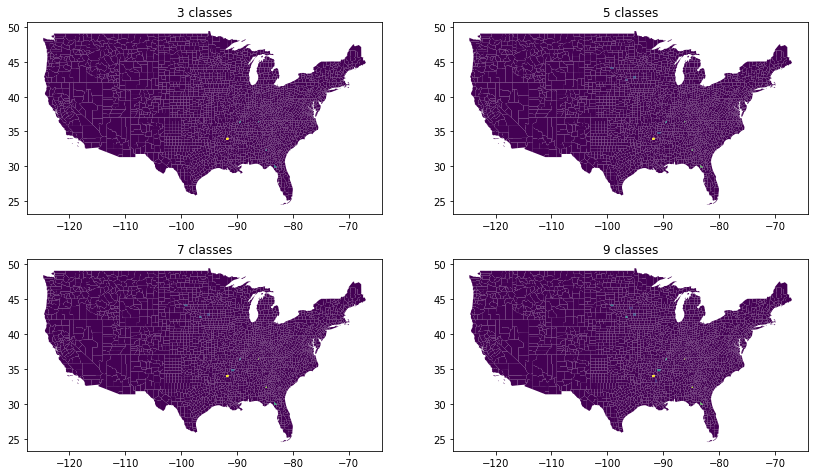

In [127]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))
myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for idx, val in enumerate([3,5,7,9]):
    cty_cont.plot(column='case_rate_100k', scheme='MaximumBreaks', k=val, ax=myaxs[idx], legend=False)
    myaxs[idx].set_title(str(val) + " classes")
plt.show()

### Head-Tail

HeadTailBreaks              

      Interval         Count
----------------------------
[    0.00,  2606.37] |  1785
( 2606.37,  4050.31] |   825
( 4050.31,  5401.65] |   326
( 5401.65,  6941.49] |   127
( 6941.49,  9480.12] |    30
( 9480.12, 12481.72] |     8
(12481.72, 14810.50] |     3
(14810.50, 16127.68] |     3
(16127.68, 17705.77] |     1


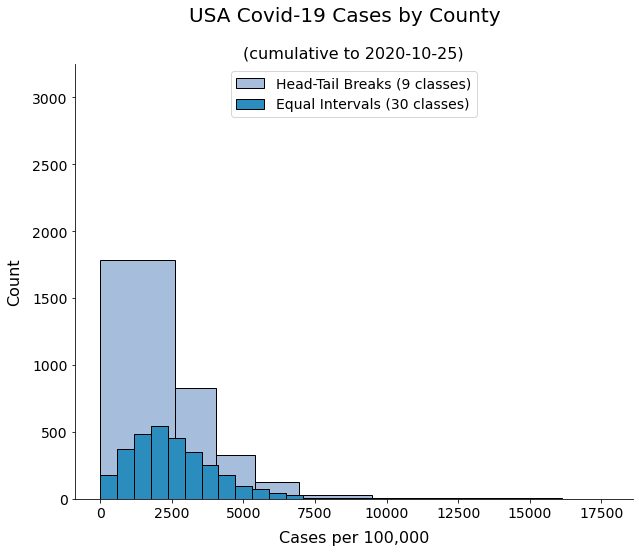

In [145]:
hist_classification_comparison("Head-Tail Breaks", classbins=5, rawbins=30)

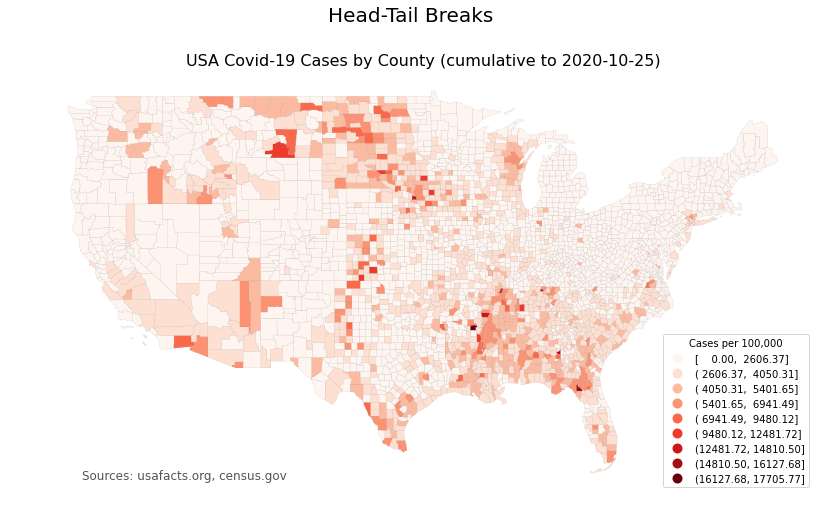

In [284]:
map_classification_comparison("Head-Tail Breaks", 5)

<AxesSubplot:>

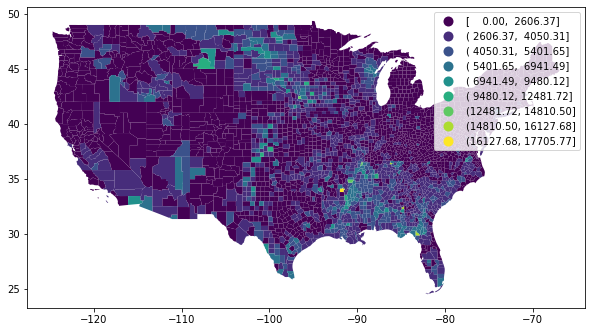

In [39]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='HeadTailBreaks', ax=ax, legend=True)

### Fisher Jenks
(A.K.A Natural Breaks)

FisherJenks                 

      Interval         Count
----------------------------
[    0.00,  1654.37] |   939
( 1654.37,  3014.26] |  1145
( 3014.26,  4778.78] |   748
( 4778.78,  8742.93] |   257
( 8742.93, 17705.77] |    19


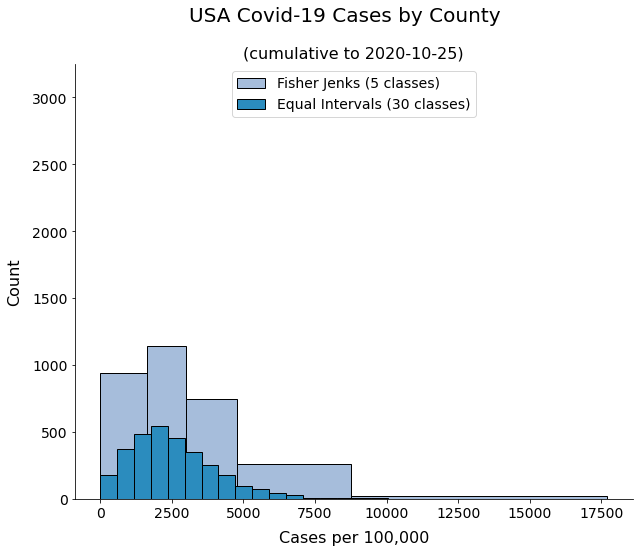

In [146]:
hist_classification_comparison("Fisher Jenks", classbins=5, rawbins=30)

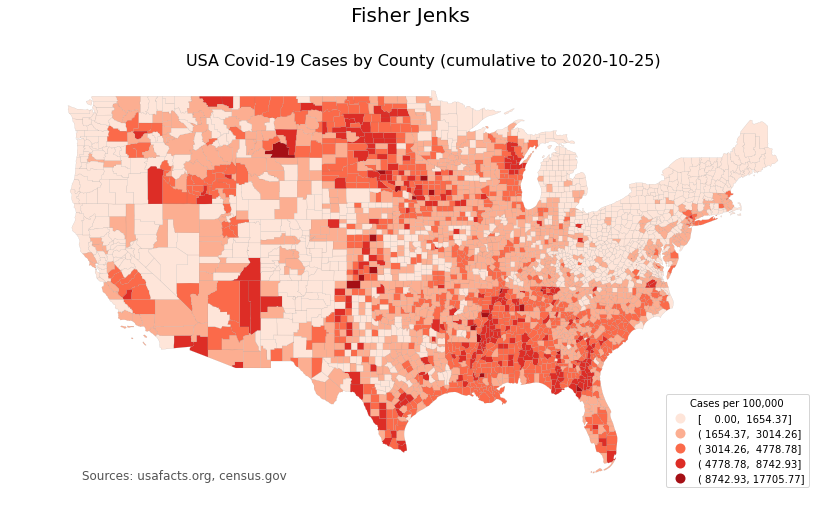

In [285]:
map_classification_comparison("Fisher Jenks", 5)

<AxesSubplot:>

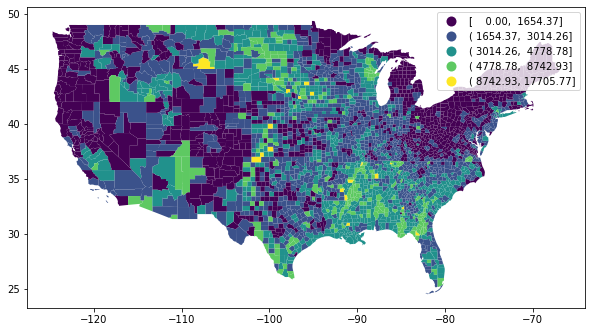

In [86]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='fisherjenks', ax=ax, legend=True)

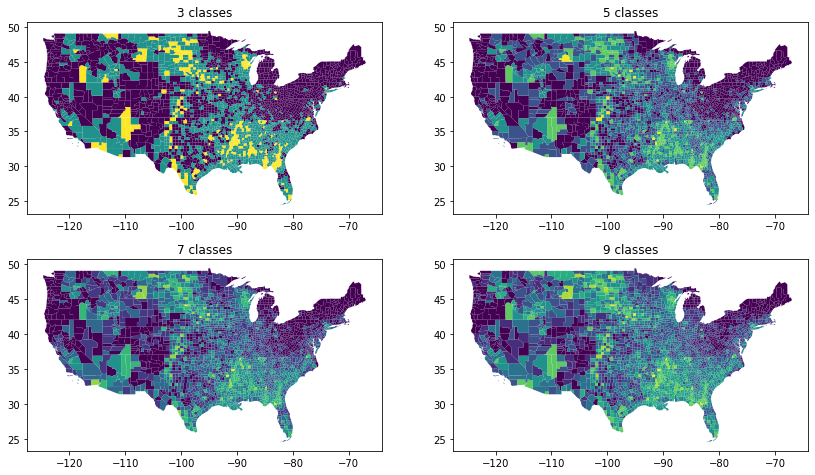

In [113]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))
myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for idx, val in enumerate([3,5,7,9]):
    cty_cont.plot(column='case_rate_100k', scheme='fisherjenks', k=val, ax=myaxs[idx], legend=False)
    myaxs[idx].set_title(str(val) + " classes")
plt.show()

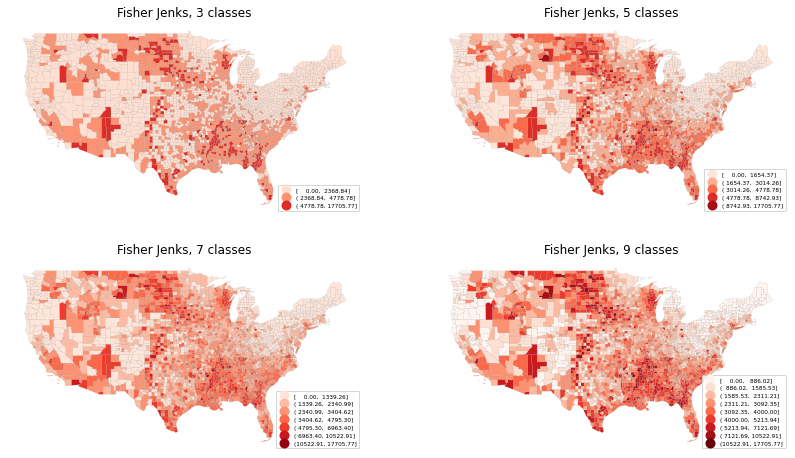

In [50]:
map_nclasses_comparison('Fisher Jenks')